In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [4]:
train['source'] = 'train'
test['source'] = 'test'
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [7]:
data = pd.concat([train,test],ignore_index=True)
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [8]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [9]:
train.shape

(8523, 13)

In [10]:
test.shape

(5681, 12)

In [11]:
data.shape

(14204, 13)

In [18]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [21]:
data.apply(lambda x: (sum(x.isnull())))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [22]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [28]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [30]:
len(data["Item_Fat_Content"].unique())

5

In [43]:
categorical_features = data.select_dtypes(include= [np.object])
categorical_features.head()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,Dairy,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,Soft Drinks,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,Meat,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,Fruits and Vegetables,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,Household,OUT013,Tier 3,High,Supermarket Type1,train


In [32]:
numerical_features = data.select_dtypes(include = [np.number])

In [34]:
numerical_features.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
0,249.8092,3735.1380,0.016047,9.30,1999
1,48.2692,443.4228,0.019278,5.92,2009
2,141.6180,2097.2700,0.016760,17.50,1999
3,182.0950,732.3800,0.000000,19.20,1998
4,53.8614,994.7052,0.000000,8.93,1987


In [37]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [38]:
for col in categorical_features:
    print("\n%s column"%col)
    print(data[col].value_counts())


Item_Fat_Content column
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Identifier column
FDR19    10
FDZ56    10
NCF30    10
FDZ45    10
NCH07    10
FDW56    10
FDU12    10
NCK29    10
FDT09    10
FDP03    10
FDT32    10
FDE28    10
NCG18    10
FDT31    10
NCL17    10
FDS47    10
FDL36    10
FDP09    10
NCM54    10
FDJ33    10
DRI03    10
FDQ04    10
FDV52    10
FDI56    10
FDR31    10
DRK35    10
FDF22    10
FDA39    10
DRK13    10
FDO15    10
         ..
FDD21     8
FDU34     8
FDC39     8
FDW57     8
FDM03     8
FDW08     8
FDX11     8
FDY44     8
FDU10     8
FDA35     8
FDW60     8
FDG24     8
FDK10     8
FDB46     8
NCQ50     8
NCG55     8
FDT26     8
NCW54     7
NCL42     7
FDR51     7
FDO33     7
DRN11     7
FDH58     7
FDM50     7
FDL50     7
FDM10     7
FDX49     7
FDS22     7
FDM52     7
FDI46     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Type column
Fruits and Vegetables    2013
Snac

In [42]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
categorical_features.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source'],
      dtype='object')

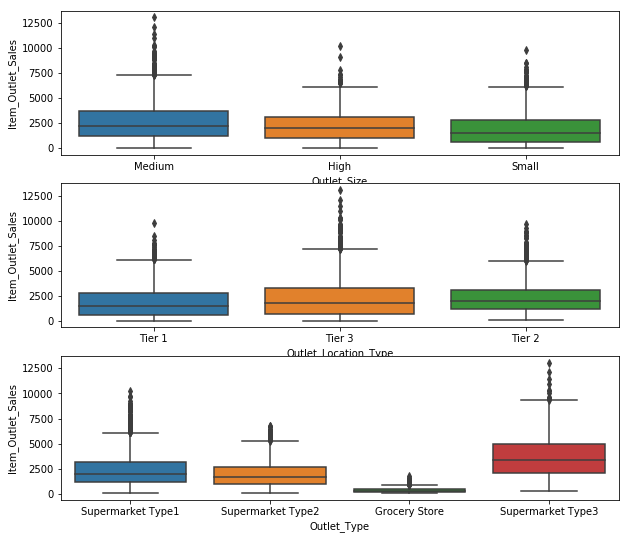

In [48]:
plt.figure(figsize= (10,9))

plt.subplot(311)
sns.boxplot(x="Outlet_Size", y= "Item_Outlet_Sales",data=data)

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)

plt.show()


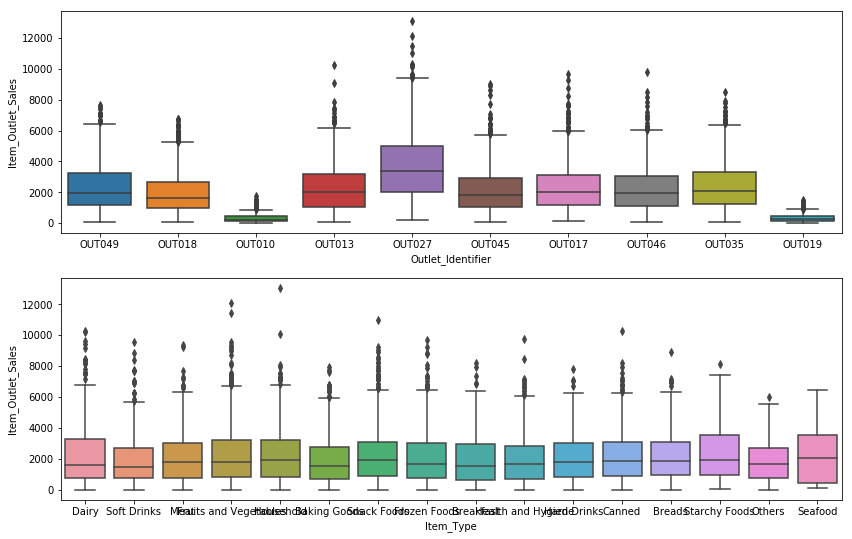

In [49]:
plt.figure(figsize = (14,9))

plt.subplot(211)
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data)

plt.subplot(212)
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data)



plt.show()

In [59]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = "most_frequent")

In [60]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [61]:
for i in data:
    data[i] = si.fit_transform(data[i].values.reshape(-1,1))
       

In [62]:
data.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
source                       0
dtype: int64

In [63]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])


In [64]:
data['Item_Type_Combined']

0        FD
1        DR
2        FD
3        FD
4        NC
5        FD
6        FD
7        FD
8        FD
9        FD
10       FD
11       FD
12       FD
13       FD
14       FD
15       FD
16       NC
17       FD
18       DR
19       FD
20       FD
21       FD
22       NC
23       FD
24       FD
25       NC
26       FD
27       DR
28       FD
29       FD
         ..
14174    FD
14175    FD
14176    FD
14177    FD
14178    FD
14179    FD
14180    FD
14181    FD
14182    DR
14183    FD
14184    DR
14185    FD
14186    DR
14187    DR
14188    DR
14189    FD
14190    FD
14191    FD
14192    FD
14193    FD
14194    FD
14195    NC
14196    FD
14197    DR
14198    FD
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item_Type_Combined, Length: 14204, dtype: object

In [65]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].replace({'FD' : 'Food', 'NC' : 'Non-Consumable','DR' : 'Drinks'})

In [68]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [69]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable


In [72]:
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [73]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace({"LF" : "Low Fat", "reg" : "Regular","low fat": "Low Fat"})

In [74]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable


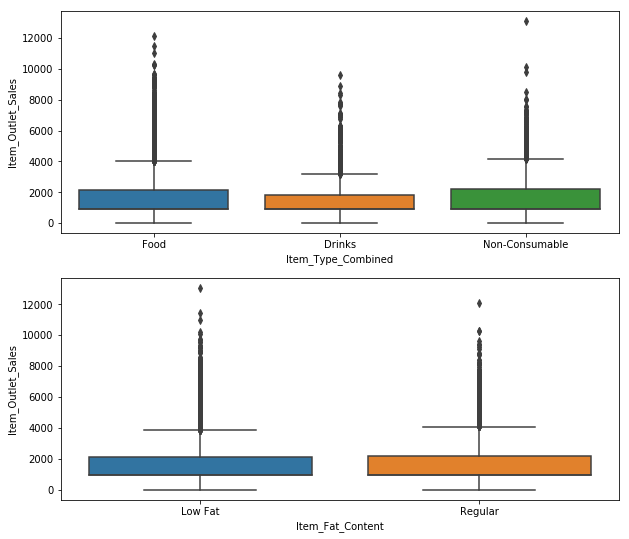

In [76]:
plt.figure(figsize = (10,9))

plt.subplot(211)
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=data)

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data)
plt.show()

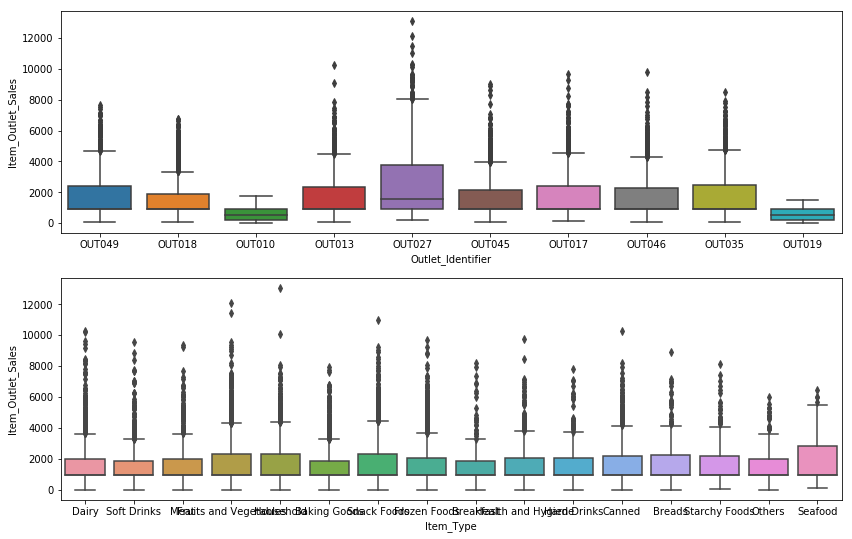

In [77]:
plt.figure(figsize = (14,9))

plt.subplot(211)
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data)


plt.subplot(212)
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data)

plt.show()

In [78]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable


In [79]:
df=data.loc[:,['Item_Outlet_Sales']]
df.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


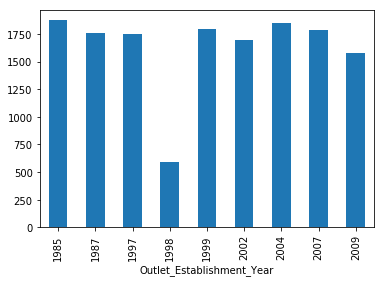

In [80]:
data.groupby('Outlet_Establishment_Year')["Item_Outlet_Sales"].mean().plot.bar()

In [84]:
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source',
       'Item_Type_Combined'],
      dtype='object')

In [85]:
data["Outlet_Years"] = 2009-data['Outlet_Establishment_Year']

In [87]:
data["Outlet_Years"].head()

0    10
1     0
2    10
3    11
4    22
Name: Outlet_Years, dtype: int64

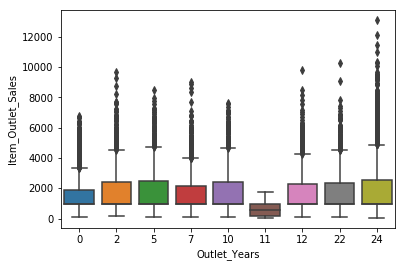

In [89]:
sns.boxplot(x="Outlet_Years",y='Item_Outlet_Sales',data=data)
plt.show()

In [90]:
temp_data = data[data.Outlet_Establishment_Year == 1998]

In [93]:
temp_data['Outlet_Type'].value_counts()

Grocery Store    925
Name: Outlet_Type, dtype: int64

In [94]:
data.shape

(14204, 15)

In [95]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,10
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,0
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,10
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,Food,11
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,22


In [96]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [97]:
data['Outlet']= le.fit_transform(data['Outlet_Identifier'])

In [99]:
var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var:
    data[i]=le.fit_transform(data[i])

In [100]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,1,10,9
1,1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,0,0,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,1,10,9
3,1,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,2,1,0,train,1,11,0
4,0,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,2,0,1,train,2,22,1


In [101]:
data.dtypes

Item_Fat_Content               int32
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type           int32
Outlet_Size                    int32
Outlet_Type                    int32
source                        object
Item_Type_Combined             int32
Outlet_Years                   int64
Outlet                         int64
dtype: object

In [102]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [106]:
train = data[data.source == "train"]
test = data[data.source == "test"]

In [107]:
train.shape

(8523, 14)

In [108]:
test.shape

(5681, 14)

In [112]:
train.drop('source',axis =1 , inplace=True)


KeyError: "['source'] not found in axis"

In [113]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,0,1,1,1,10,9
1,1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,2,1,2,0,0,3
2,0,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,0,1,1,1,10,9
3,1,FDX07,182.0950,732.3800,0.000000,19.20,OUT010,2,1,0,1,11,0
4,0,NCD19,53.8614,994.7052,0.000000,8.93,OUT013,2,0,1,2,22,1


In [114]:
test.drop('source',axis=1,inplace=True)

In [116]:
test.head()
test1=test.copy()

In [117]:
test1.drop("Item_Outlet_Sales",axis=1,inplace=True)

In [118]:
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(train,test1,test_size=0.33,random_state=47)

ValueError: Found input variables with inconsistent numbers of samples: [8523, 5681]

In [119]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,0,1,1,1,10,9
1,1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,2,1,2,0,0,3
2,0,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,0,1,1,1,10,9
3,1,FDX07,182.0950,732.3800,0.000000,19.20,OUT010,2,1,0,1,11,0
4,0,NCD19,53.8614,994.7052,0.000000,8.93,OUT013,2,0,1,2,22,1


In [120]:
target = "Item_Outlet_Sales"
IDcol = ['Item_Identifier','Outlet_Identifier']
predictors = [x for x in train.columns if x not in [target]+IDcol]


In [126]:
train[predictors].head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet
0,0,249.8092,0.016047,9.30,0,1,1,1,10,9
1,1,48.2692,0.019278,5.92,2,1,2,0,0,3
2,0,141.6180,0.016760,17.50,0,1,1,1,10,9
3,1,182.0950,0.000000,19.20,2,1,0,1,11,0
4,0,53.8614,0.000000,8.93,2,0,1,2,22,1


In [127]:
test.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet
8523,0,FDW58,107.8622,958.752,0.007565,20.750,OUT049,0,1,1,1,10,9
8524,1,FDW14,87.3198,958.752,0.038428,8.300,OUT017,1,1,1,1,2,2
8525,0,NCN55,241.7538,958.752,0.099575,14.600,OUT010,2,1,0,2,11,0
8526,0,FDQ58,155.0340,958.752,0.015388,7.315,OUT017,1,1,1,1,2,2
8527,1,FDY38,234.2300,958.752,0.118599,17.600,OUT027,2,1,3,1,24,5


In [129]:
train[predictors].head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet
0,0,249.8092,0.016047,9.30,0,1,1,1,10,9
1,1,48.2692,0.019278,5.92,2,1,2,0,0,3
2,0,141.6180,0.016760,17.50,0,1,1,1,10,9
3,1,182.0950,0.000000,19.20,2,1,0,1,11,0
4,0,53.8614,0.000000,8.93,2,0,1,2,22,1


In [131]:
train[target].head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [134]:
test1[predictors].head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Combined,Outlet_Years,Outlet
8523,0,107.8622,0.007565,20.750,0,1,1,1,10,9
8524,1,87.3198,0.038428,8.300,1,1,1,1,2,2
8525,0,241.7538,0.099575,14.600,2,1,0,2,11,0
8526,0,155.0340,0.015388,7.315,1,1,1,1,2,2
8527,1,234.2300,0.118599,17.600,2,1,3,1,24,5


In [136]:
test1[target]

KeyError: 'Item_Outlet_Sales'

In [137]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [138]:
lr.fit(train[predictors],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [140]:
lr.score(train[predictors],train[target])

0.5109046733658035

In [141]:
test1[target]=lr.predict(test1[predictors])

In [143]:
test1[target].head()

8523    2038.195486
8524    1202.128191
8525    2179.400411
8526    2245.868908
8527    5053.843934
Name: Item_Outlet_Sales, dtype: float64

In [147]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

In [160]:
cvs= cross_val_score(lr,train[predictors],train[target],cv=10)
#cvs = np.sqrt(np.abs(cvs))

In [161]:
cvs

array([0.51729363, 0.54089531, 0.50009922, 0.51265528, 0.46148211,
       0.51279819, 0.52932333, 0.48999167, 0.52637961, 0.4906585 ])

In [162]:
cvs.mean()

0.508157684953628

In [163]:
cvs.std()

0.022038096641573218

In [167]:
np.sqrt(mean_squared_error(test[target],test1[target]))

1726.5683947497093

In [165]:
r2_score(test[target],test1[target])

-2.5627408478685246e+31

In [168]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [169]:
rfr.fit(train[predictors],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [170]:
rfr.score(train[predictors],train[target])

0.9168999767352279

In [173]:
rfrtest=rfr.predict(test1[predictors])

In [174]:
mean_squared_error(test[target],rfrtest)

3579411.844970483

In [176]:
coef1=lr.coef_

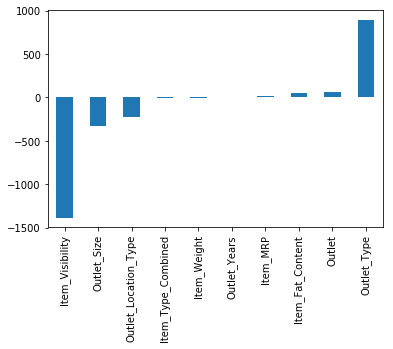

In [178]:
coef1 = pd.Series(lr.coef_, predictors).sort_values()
coef1.plot(kind='bar')